In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import math
%matplotlib inline

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv("Data/county_data_clean.csv")

## Dataframe for States and Counties

In [4]:
df_states = df[df["county_fips_code"] == 0] #Dataframe for states only
df_counties = df[df["county_fips_code"] != 0] #Dataframe for counties only

In [5]:
df_counties = df_counties.set_index("name")
df_states = df_states.set_index("name")

In [6]:
df_counties = df_counties.drop(["Unnamed: 0"], axis=1)
df_states = df_states.drop(["Unnamed: 0"], axis=1)

## Missing Values by Column

In [7]:
def missing_values_all_col(df):
    """
    Returns proportion of missing values in each column of df
    """ 
    df_missing_values = round(df.isna().mean().sort_values(ascending = False), 4)
    return df_missing_values

In [8]:
missing_values_all_col(df_counties)

hate_crimes                                                             0.9962
alcohol_related_hospitalizations                                        0.9803
fall_fatalities_65                                                      0.9796
self_inflicted_injury_hospitalizations                                  0.9780
coronary_heart_disease_hospitalizations                                 0.9777
cerebrovascular_disease_hospitalizations                                0.9777
opioid_hospital_visits                                                  0.9774
drug_arrests                                                            0.9774
off_road_motor_vehicle_crash_related_er_visits                          0.9774
on_road_motor_vehicle_crash_related_er_visits                           0.9771
childhood_immunizations                                                 0.9771
population_growth                                                       0.9771
motor_vehicle_crash_occupancy_rate                  

In [9]:
missing_values_all_col(df_states)

population_growth                                                       0.9808
low_birthweight_black                                                   0.9808
premature_age_adjusted_mortality_black                                  0.9808
premature_age_adjusted_mortality_hispanic                               0.9808
premature_age_adjusted_mortality_white                                  0.9808
total_female_population                                                 0.9808
child_mortality_black                                                   0.9808
child_mortality_hispanic                                                0.9808
child_mortality_white                                                   0.9808
infant_mortality_black                                                  0.9808
infant_mortality_hispanic                                               0.9808
infant_mortality_white                                                  0.9808
teen_births_white                                   

## Missing Values by State

In [10]:
def missing_values_col(df, col):
    """
    Returns missing values by state for specific column in df.
    """
    df_col = df[["state_abbreviation", col]].set_index("state_abbreviation").groupby("state_abbreviation")
    missing_values_col = df_col.apply(lambda x: round(x.isnull().mean(),4)).sort_values(by = col, ascending = False)
    return missing_values_col

In [11]:
def missing_values_state(df):
    """
    Returns missing values by state across all columns.
    """
    total_missing = df.isnull().sum().sum()
    missing_by_state = df.groupby("state_abbreviation").apply(lambda x: x.isnull().sum()).sum(axis = 1)/total_missing
    missing_by_state = round(missing_by_state.sort_values(ascending = False), 4)
    return missing_by_state

In [12]:
df_counties["state_abbreviation"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [13]:
def missing_values_range(df, lower = -0.1, upper = 1.1):
    states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
              'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
              'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
              'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
              'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
    states = pd.DataFrame(states)
    states.columns = ["state_abbreviation"]
    df_missing = missing_values_all_col(df)
    missing = df_missing[(df_missing >= lower) & (df_missing < upper)].index 
    if "state_abbreviation" in missing:
        missing = missing.drop("state_abbreviation")
    for col in missing:
        missing_col = missing_values_col(df, col)
        states = states.merge(missing_col, how = "left", on = "state_abbreviation")
    return states

## Columns with >= 95% missingness

In [14]:
missing_values_range(df_counties, lower = 0.95)

,state_abbreviation,hate_crimes,alcohol_related_hospitalizations,fall_fatalities_65,self_inflicted_injury_hospitalizations,coronary_heart_disease_hospitalizations,cerebrovascular_disease_hospitalizations,opioid_hospital_visits,drug_arrests,off_road_motor_vehicle_crash_related_er_visits,on_road_motor_vehicle_crash_related_er_visits,childhood_immunizations,population_growth,motor_vehicle_crash_occupancy_rate,w_2_enrollment,smoking_during_pregnancy,cancer_incidence,reading_proficiency,older_adults_living_alone,poverty,total_female_population,child_abuse,injury_hospitalizations,year_structure_built,male_population_0_17,male_population_18_44,male_population_45_64,male_population_65,total_male_population,female_population_0_17,female_population_18_44,female_population_45_64,female_population_65,communicable_disease
0,AL,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,AK,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,AZ,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,AR,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,CA,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,CO,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,CT,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,DE,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,DC,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,FL,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Here's an observation: The columns with missing percentage greater than 95 only have non-missing values from the state of Wisconsin.

## Columns with >= 80% missingness

In [15]:
missing_values_range(df_counties, lower = 0.8, upper = 0.95)

,state_abbreviation,infant_mortality_hispanic,infant_mortality_black,child_mortality_hispanic,infant_mortality_white,child_mortality_black,child_mortality_white
0,AL,0.9851,0.7910,0.9403,0.7910,0.6866,0.6567
1,AK,1.0000,1.0000,1.0000,1.0000,0.9655,0.9655
2,AZ,0.6000,0.8000,0.4667,0.6000,0.8000,0.4667
3,AR,0.9600,0.9600,0.9467,0.9333,0.9067,0.8800
4,CA,0.5000,0.7414,0.3966,0.5000,0.7241,0.3966
5,CO,0.8594,0.9531,0.8281,0.8594,0.9375,0.8281
6,CT,0.5000,0.6250,0.5000,0.5000,0.5000,0.5000
7,DE,0.6667,0.0000,0.3333,0.0000,0.0000,0.0000
8,DC,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,FL,0.7164,0.6269,0.6119,0.6119,0.5224,0.4776


The columns with missing percentage between 0.80 and 0.95 relate to infant and child mortality (for subgroups of population - on a general level the columns 'infant_mortality' and 'child_mortality' have lower missingess). For national levels this should be dropped, but for state models there are states with 0% missing values so it can be kept.

## Columns with between 50% and 80% missingness

In [16]:
missing_values_range(df_counties, lower = 0.5, upper = 0.8)

,state_abbreviation,premature_death_hispanic,premature_age_adjusted_mortality_hispanic,preventable_hospital_stays_hispanic,driving_alone_to_work_black,life_expectancy_hispanic,infant_mortality,homicides,driving_alone_to_work_hispanic,life_expectancy_black,premature_death_black,premature_age_adjusted_mortality_black,mammography_screening_hispanic,teen_births_black,low_birthweight_black,low_birthweight_hispanic,disconnected_youth,preventable_hospital_stays_black,mammography_screening_black
0,AL,0.8060,0.8060,0.7612,0.1940,0.6418,0.4179,0.2537,0.6866,0.1493,0.0746,0.0746,0.6119,0.1194,0.1343,0.5373,0.3881,0.0448,0.0149
1,AK,0.8966,0.8966,0.8966,0.8966,0.8276,0.8276,0.8276,0.6897,0.8966,0.9310,0.9310,0.7931,0.9310,0.9310,0.8276,0.5517,0.9310,0.9310
2,AZ,0.0000,0.0000,0.0000,0.6000,0.0000,0.1333,0.0667,0.0000,0.4667,0.4667,0.4667,0.0000,0.4667,0.4667,0.0000,0.2000,0.4667,0.4000
3,AR,0.9067,0.9067,0.8267,0.4267,0.7733,0.7067,0.5067,0.7600,0.4400,0.4000,0.4000,0.7600,0.3867,0.3867,0.6800,0.6400,0.3733,0.3333
4,CA,0.1379,0.1379,0.1207,0.3966,0.0862,0.2586,0.1379,0.0690,0.3448,0.3621,0.3621,0.0345,0.4310,0.3793,0.0862,0.2069,0.3621,0.2759
5,CO,0.5156,0.5156,0.4531,0.8438,0.3906,0.7969,0.7188,0.4062,0.8438,0.8281,0.8281,0.3125,0.8438,0.8125,0.3438,0.8125,0.8750,0.8281
6,CT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1250,0.0000,0.0000,0.1250,0.1250,0.0000
7,DE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,DC,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,FL,0.3134,0.3134,0.2687,0.2090,0.2687,0.2687,0.1791,0.2985,0.0746,0.0746,0.0746,0.2388,0.0597,0.0597,0.2239,0.2388,0.0448,0.0448


## Columns with between 20% and 50% missingness

In [17]:
missing_values_range(df_counties, lower = 0.2, upper = 0.5)

,state_abbreviation,teen_births_hispanic,premature_death_white,premature_age_adjusted_mortality_white,driving_alone_to_work_white,drug_overdose_deaths,life_expectancy_white,preventable_hospital_stays_white,low_birthweight_white,flu_vaccinations_hispanic,flu_vaccinations_black,child_mortality,teen_births_white,median_household_income_black,mammography_screening_white,children_in_poverty_black,residential_segregation_black_white,firearm_fatalities,flu_vaccinations_white,hiv_prevalence,median_household_income_hispanic
0,AL,0.4925,0.0597,0.0597,0.1493,0.4627,0.0896,0.0299,0.0896,0.5224,0.0149,0.1940,0.1045,0.0149,0.0149,0.0299,0.0149,0.0597,0.0149,0.0000,0.3284
1,AK,0.8621,0.8966,0.8966,0.6897,0.8276,0.8276,0.8966,0.8276,0.7931,0.8621,0.6207,0.8621,0.5862,0.7931,0.7931,0.7241,0.5517,0.7931,0.6552,0.2069
2,AZ,0.0000,0.0000,0.0000,0.0000,0.0667,0.0000,0.0000,0.0000,0.0000,0.2667,0.1333,0.0000,0.2000,0.0000,0.3333,0.0000,0.0667,0.0000,0.0000,0.0000
3,AR,0.5733,0.3867,0.3867,0.3467,0.6000,0.3867,0.3467,0.3333,0.5200,0.2933,0.3333,0.2933,0.3200,0.2667,0.2400,0.2133,0.2133,0.1867,0.0267,0.3067
4,CA,0.0862,0.1379,0.1379,0.0690,0.1034,0.0862,0.1207,0.0862,0.0172,0.1552,0.1552,0.0862,0.2586,0.0345,0.2759,0.1552,0.0690,0.0172,0.0690,0.0172
5,CO,0.3906,0.5156,0.5156,0.4062,0.5938,0.3906,0.4531,0.3438,0.2500,0.7812,0.6250,0.3906,0.7344,0.3125,0.6562,0.6094,0.4062,0.2500,0.2812,0.1094
6,CT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,DE,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,DC,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,FL,0.2090,0.0746,0.0746,0.1940,0.1940,0.0746,0.0448,0.0448,0.1642,0.0149,0.1493,0.0448,0.0149,0.0448,0.0000,0.0000,0.0746,0.0149,0.0000,0.0746


## Columns with less than 20% missingness

In [18]:
missing_values_range(df_counties, lower = 0.1, upper = 0.2)

,state_abbreviation,children_in_poverty_hispanic,motor_vehicle_crash_deaths,median_household_income_white,residential_segregation_non_white_white
0,AL,0.2239,0.0000,0.0149,0.0000
1,AK,0.3103,0.7586,0.1724,0.3448
2,AZ,0.0000,0.0000,0.0000,0.0000
3,AR,0.1200,0.0400,0.0933,0.0000
4,CA,0.0000,0.0345,0.0172,0.0345
5,CO,0.1406,0.3438,0.1094,0.2188
6,CT,0.0000,0.0000,0.0000,0.0000
7,DE,0.0000,0.0000,0.0000,0.0000
8,DC,0.0000,0.0000,0.0000,0.0000
9,FL,0.0448,0.0000,0.0000,0.0000


## Number of Counties in Each State

In [19]:
df_counties.groupby("state_abbreviation").size()

state_abbreviation
AK     29
AL     67
AR     75
AZ     15
CA     58
CO     64
CT      8
DC      1
DE      3
FL     67
GA    159
HI      5
IA     99
ID     44
IL    102
IN     92
KS    105
KY    120
LA     64
MA     14
MD     24
ME     16
MI     83
MN     87
MO    115
MS     82
MT     56
NC    100
ND     53
NE     93
NH     10
NJ     21
NM     33
NV     17
NY     62
OH     88
OK     77
OR     36
PA     67
RI      5
SC     46
SD     66
TN     95
TX    254
UT     29
VA    133
VT     14
WA     39
WI     72
WV     55
WY     23
dtype: int64

## Data Types in Dataset

In [20]:
df_counties.dtypes

state_fips_code                                                           int64
county_fips_code                                                          int64
5_digit_fips_code                                                         int64
state_abbreviation                                                       object
premature_death                                                         float64
premature_death_black                                                   float64
premature_death_hispanic                                                float64
premature_death_white                                                   float64
poor_or_fair_health                                                     float64
poor_physical_health_days                                               float64
poor_mental_health_days                                                 float64
low_birthweight                                                         float64
low_birthweight_black                   

## The columns with whole numbers as values (raw numbers as values)

In [21]:
for col in df_counties.loc[:, df_counties.dtypes == np.float64]:
    if np.array_equal(df_counties[col].fillna(-9999), df_counties[col].fillna(-9999).astype(int)):
        print(col)

preventable_hospital_stays
preventable_hospital_stays_black
preventable_hospital_stays_hispanic
preventable_hospital_stays_white
drinking_water_violations
median_household_income
median_household_income_black
median_household_income_hispanic
median_household_income_white
drug_arrests
w_2_enrollment
male_population_0_17
male_population_18_44
male_population_45_64
male_population_65
total_male_population
female_population_0_17
female_population_18_44
female_population_45_64
female_population_65
total_female_population


## The columns whose values are not been 0 and 1 (not percentages) - these may be raw numbers or rates/ratios

In [22]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for col in df_counties.select_dtypes(include = numerics).columns:
    if df[col].max() > 1 or df[col].min() < 0:
        print(col)

state_fips_code
county_fips_code
5_digit_fips_code
premature_death
premature_death_black
premature_death_hispanic
premature_death_white
poor_physical_health_days
poor_mental_health_days
food_environment_index
sexually_transmitted_infections
teen_births
teen_births_black
teen_births_hispanic
teen_births_white
ratio_of_population_to_primary_care_physicians
ratio_of_population_to_dentists
ratio_of_population_to_mental_health_providers
preventable_hospital_stays
preventable_hospital_stays_black
preventable_hospital_stays_hispanic
preventable_hospital_stays_white
income_inequality
social_associations
violent_crime
injury_deaths
air_pollution_particulate_matter
life_expectancy
life_expectancy_black
life_expectancy_hispanic
life_expectancy_white
premature_age_adjusted_mortality
premature_age_adjusted_mortality_black
premature_age_adjusted_mortality_hispanic
premature_age_adjusted_mortality_white
child_mortality
child_mortality_black
child_mortality_hispanic
child_mortality_white
infant_mortal

# Visualizing Data

In [23]:
def hist_plot(df, var, title = "", x_label = "", y_label = ""):
    sns.set(style='white', palette="colorblind", font_scale=1.1, rc={"figure.figsize": [16, 11]})
    plot = sns.histplot(data=df, x = var).set(xlabel= x_label, ylabel= y_label, title = title)
    sns.despine()
    return plot

### Uninsured Rate

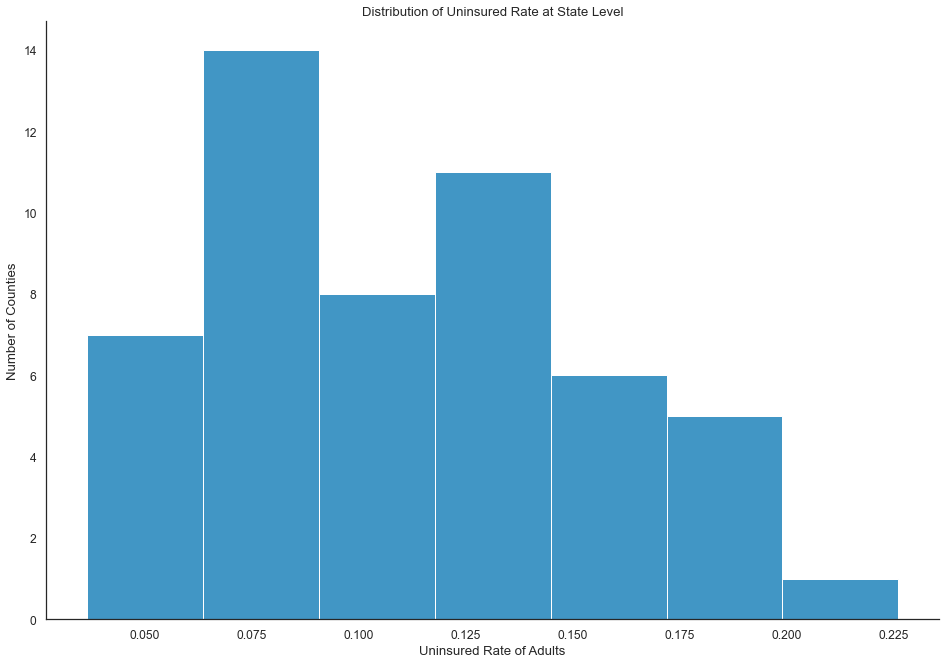

In [24]:
hist_plot(df = df_states, var = "uninsured_adults", title = "Distribution of Uninsured Rate at State Level", 
          x_label = "Uninsured Rate of Adults", y_label = "Number of Counties")
plt.savefig("Visualizations/Uninsured Rate/State.png")

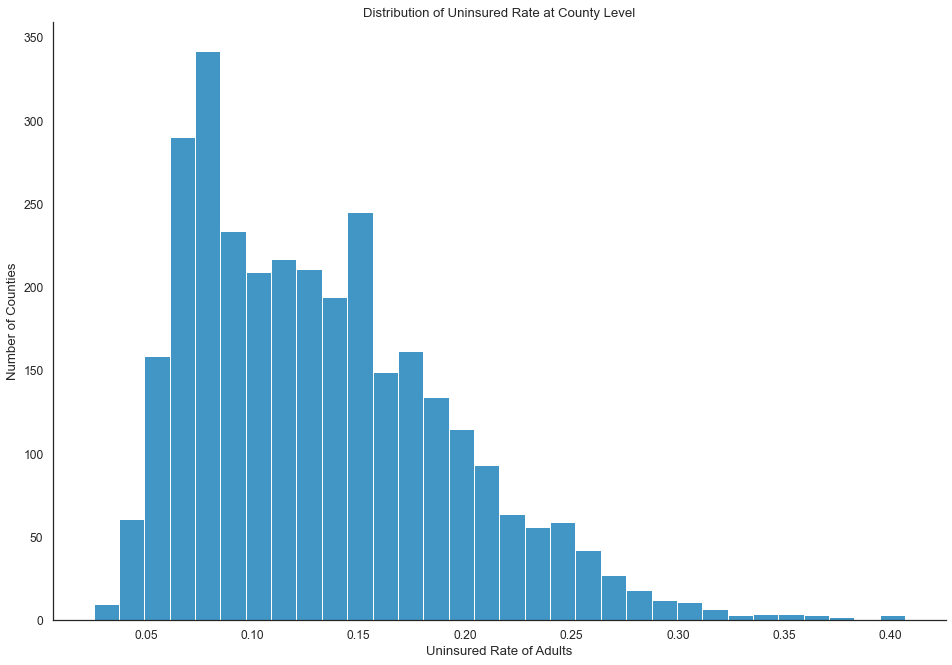

In [25]:
hist_plot(df = df_counties, var = "uninsured_adults", title = "Distribution of Uninsured Rate at County Level", 
          x_label = "Uninsured Rate of Adults", y_label = "Number of Counties")
plt.savefig("Visualizations/Uninsured Rate/County.png")

In [ ]:
for state in df_counties["state_abbreviation"].unique():
    plt.figure()
    hist_plot(df = df_counties[df_counties["state_abbreviation"] == state], var = "uninsured_adults", title = "Distribution of Uninsured Rate in " + state, 
          x_label = "Uninsured Rate of Adults", y_label = "Number of Counties")
    plt.savefig("Visualizations/Uninsured Rate/" + state + ".png")
    